In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

In [9]:
import matplotlib.pyplot as plt
import librosa

audio_dir = '/kaggle/input/urbansound8k'
for fold in audio_dir:
    fold_path = os.path.join(audio_dir, fold)
    if os.path.isdir(fold_path): 
        for filename in os.listdir(fold_path):
            if filename.endswith('.wav'):
                audio_path = os.path.join(fold_path, filename)
        
                y, sr = librosa.load(audio_path, sr=16000)

                print(f"Sampling rate: {sr}")
                print(f"Audio length (seconds): {len(y)/sr:.2f}")

['fold7', 'fold1', 'fold3', 'fold5', 'fold10', 'UrbanSound8K.csv', 'fold9', 'fold8', 'fold4', 'fold2', 'fold6']


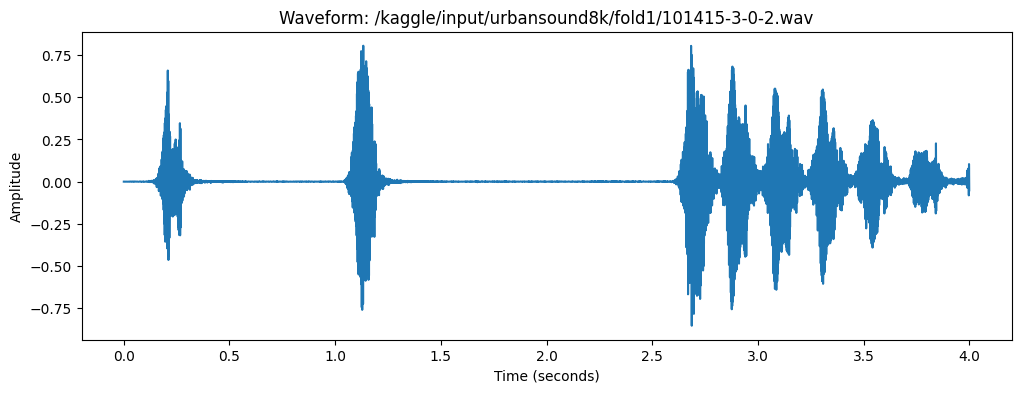

In [10]:
sample_file = '/kaggle/input/urbansound8k/fold1/101415-3-0-2.wav'
audio_path = os.path.join(fold_path, sample_file)

y, sr = librosa.load(audio_path, sr=16000)

time = np.linspace(0, len(y)/sr, num=len(y))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Waveform: {sample_file}")
plt.show()

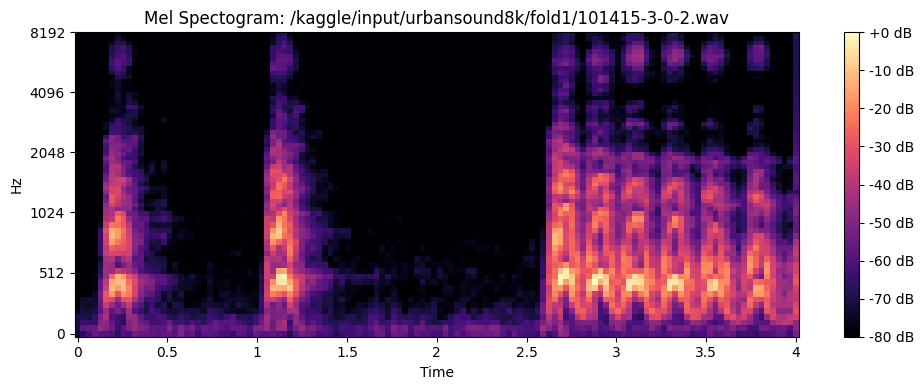

In [11]:
# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)

# Convert to log scale (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spec_db,
    sr=sr,
    hop_length=512,
    x_axis="time",
    y_axis="mel"
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Mel Spectogram: {sample_file}")
plt.tight_layout()
plt.show()
